In [1]:
from src import *

c:\Users\xafra\Documents\2A\Cassiopée\b\RFTL2\src.py:639: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(thresholds, (true_positives)/(true_positives+false_positives), label="precision")


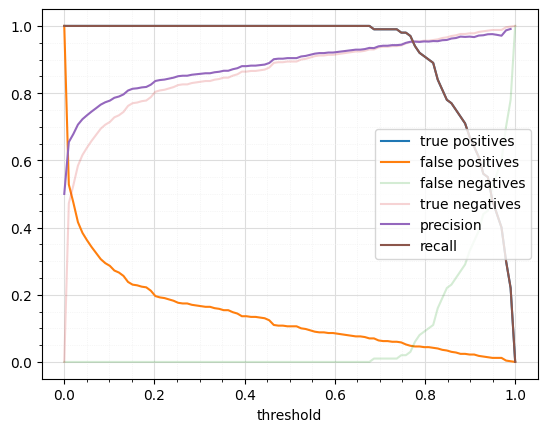

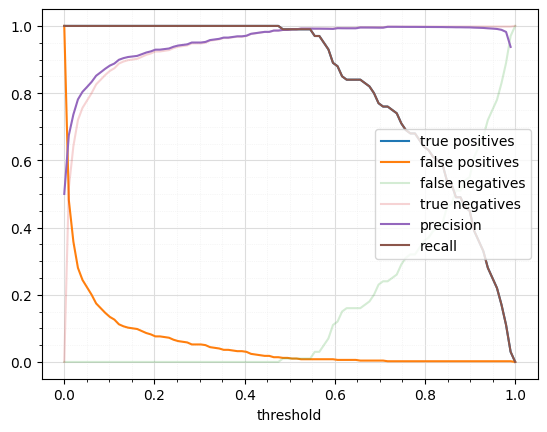

In [2]:
plot_confusion_under_threshold(data_path=r'gross_scores_naive_Isaac.npz', n_bit=100)
plot_confusion_under_threshold(data_path=r'gross_scores_pretrained_Isaac.npz', n_bit=100)

By reading the graph we can assume a threshold of 0.6 maintain a low false positive rate without affecting much the true positive rate.

In [3]:
confusion_matrix = get_confusion_matrix(data_path=r'gross_scores_naive_Isaac.npz', threshold=0.6)
print(f"True positive: {confusion_matrix[0][0]:.2%}\tTrue negative: {confusion_matrix[1][1]:.2%}\n\
False positive: {confusion_matrix[0][1]:.2%}\tFalse negative: {confusion_matrix[1][0]:.2%}")

# plt.figure()
# plt.imshow(confusion_matrix)
# plt.axis('off')
# plt.show()

True positive: 100.00%	True negative: 91.60%
False positive: 8.40%	False negative: 0.00%


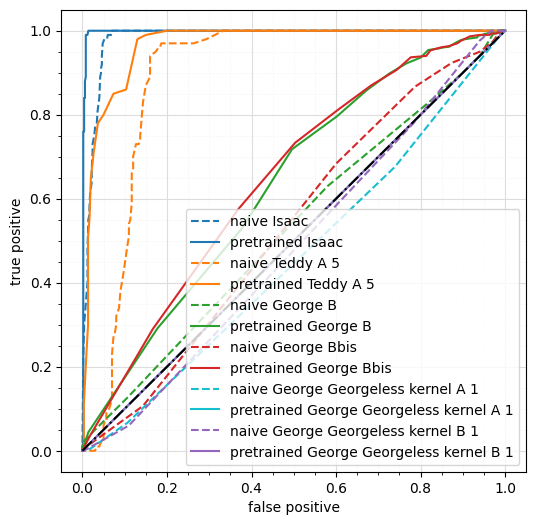

In [4]:
model_list = [r'gross_scores_naive_Isaac.npz',
              r'gross_scores_pretrained_Isaac.npz',
            #   r'gross_scores_naive_Teddy_A_2.npz',
            #   r'gross_scores_pretrained_Teddy_A_2.npz',
              r'gross_scores_naive_Teddy_A_5.npz',
              r'gross_scores_pretrained_Teddy_A_5.npz',
              r'gross_scores_naive_George_B.npz',
              r'gross_scores_pretrained_George_B.npz',
              r'gross_scores_naive_George_Bbis.npz',
              r'gross_scores_pretrained_George_Bbis.npz',

              r'gross_scores_naive_George_Georgeless_kernel_A_1.npz',
              r'gross_scores_pretrained_George_Georgeless_kernel_A_1.npz',
              r'gross_scores_naive_George_Georgeless_kernel_B_1.npz',
              r'gross_scores_pretrained_George_Georgeless_kernel_B_1.npz'
              ]
plot_roc(model_list, n_bit=100)

In [5]:
[[true_positives, false_positives], [false_negatives, true_negatives]] = get_confusion_matrix(data_path=r'gross_scores_naive_Isaac.npz', threshold=0.6)
true_positives/(true_positives+false_positives)
true_positives/(false_negatives+true_positives)

1.0